In [ ]:
#Import fastai library, it is more efficient pytorch as it uses less resources to build a model
#contains a lot of useful methods we will use later on
!pip install -Uqq fastai 
from fastai.vision.all import *

In [ ]:
#built in dataset of the fastai library. Here we are using the "FOOD" dataset which contains lots of images of different types of food. Here we downloading it from the library
foods = untar_data(URLs.FOOD)


In [ ]:
#displays path of all the files files downloaded
get_files(foods)

(#3018) [Path('/root/.fastai/data/food-101/export.pkl'),Path('/root/.fastai/data/food-101/test.txt'),Path('/root/.fastai/data/food-101/test.json'),Path('/root/.fastai/data/food-101/train.txt'),Path('/root/.fastai/data/food-101/train.json'),Path('/root/.fastai/data/food-101/labels.txt'),Path('/root/.fastai/data/food-101/classes.txt'),Path('/root/.fastai/data/food-101/images/sashimi/sashimi-3120152.jpg'),Path('/root/.fastai/data/food-101/images/sashimi/sashimi-2153561.jpg'),Path('/root/.fastai/data/food-101/images/sashimi/sashimi-2155576.jpg')...]

In [ ]:
#displays path of all the files of the images
get_image_files(foods)

(#3000) [Path('/root/.fastai/data/food-101/images/sashimi/sashimi-3120152.jpg'),Path('/root/.fastai/data/food-101/images/sashimi/sashimi-2153561.jpg'),Path('/root/.fastai/data/food-101/images/sashimi/sashimi-2155576.jpg'),Path('/root/.fastai/data/food-101/images/sashimi/sashimi-3499966.jpg'),Path('/root/.fastai/data/food-101/images/sashimi/sashimi-1452040.jpg'),Path('/root/.fastai/data/food-101/images/sashimi/sashimi-3443802.jpg'),Path('/root/.fastai/data/food-101/images/sashimi/sashimi-2926641.jpg'),Path('/root/.fastai/data/food-101/images/sashimi/sashimi-578606.jpg'),Path('/root/.fastai/data/food-101/images/sashimi/sashimi-2485579.jpg'),Path('/root/.fastai/data/food-101/images/sashimi/sashimi-1209955.jpg')...]

<Axes: >

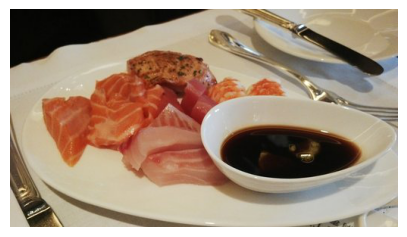

In [ ]:
#PIL is a python image library, used to manipulate images with code, here were creating the image based on its filepath and displaying it
pic=PILImage.create('/root/.fastai/data/food-101/images/sashimi/sashimi-3120152.jpg')
pic.show()

In [ ]:
#using panda library for data manipulation, here were reading all the json files and converting it into a table, here we have 21 different types of food
pd.read_json('/root/.fastai/data/food-101/test.json')

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1061830,hot_and_sour_soup/1000486,samosa/1009326,sashimi/100113,pork_chop/1012227,spring_rolls/1005480,panna_cotta/1006650,beef_tartare/101073,greek_salad/1010850,foie_gras/1007306,...,chicken_quesadilla/10257,pho/1002382,prime_rib/1006976,cheesecake/1023543,ice_cream/1004744,omelette/1019294,grilled_cheese_sandwich/1000938,lobster_roll_sandwich/1002698,nachos/1011831,oysters/1005672
1,churros/1064042,hot_and_sour_soup/1004564,samosa/1024186,sashimi/1017182,pork_chop/1019077,spring_rolls/103010,panna_cotta/1027460,beef_tartare/1029120,greek_salad/1029680,foie_gras/1044237,...,chicken_quesadilla/1030292,pho/1020153,prime_rib/102197,cheesecake/102854,ice_cream/1031536,omelette/1058816,grilled_cheese_sandwich/1003050,lobster_roll_sandwich/1029665,nachos/101954,oysters/1017801
2,churros/1074903,hot_and_sour_soup/1011278,samosa/1036216,sashimi/1043094,pork_chop/102958,spring_rolls/1036175,panna_cotta/1030883,beef_tartare/1030025,greek_salad/1053670,foie_gras/1073688,...,chicken_quesadilla/1052529,pho/1026354,prime_rib/102813,cheesecake/1073148,ice_cream/1075106,omelette/1116874,grilled_cheese_sandwich/1005927,lobster_roll_sandwich/103891,nachos/103312,oysters/1019666
3,churros/1085259,hot_and_sour_soup/1029400,samosa/103689,sashimi/1050391,pork_chop/1040432,spring_rolls/1044858,panna_cotta/103712,beef_tartare/1031053,greek_salad/1062715,foie_gras/1113614,...,chicken_quesadilla/1096804,pho/1028507,prime_rib/1035695,cheesecake/1092082,ice_cream/1100243,omelette/1122818,grilled_cheese_sandwich/100694,lobster_roll_sandwich/104300,nachos/1044020,oysters/1040557
4,churros/1097261,hot_and_sour_soup/1044215,samosa/1052427,sashimi/10551,pork_chop/1045605,spring_rolls/1067952,panna_cotta/1050629,beef_tartare/1066933,greek_salad/1101710,foie_gras/1125178,...,chicken_quesadilla/1102036,pho/1029709,prime_rib/105375,cheesecake/1096018,ice_cream/1106165,omelette/1145379,grilled_cheese_sandwich/1052563,lobster_roll_sandwich/1046809,nachos/1060157,oysters/1044823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,churros/904526,hot_and_sour_soup/963551,samosa/917040,sashimi/889209,pork_chop/92293,spring_rolls/949343,panna_cotta/97960,beef_tartare/926143,greek_salad/949442,foie_gras/953456,...,chicken_quesadilla/921154,pho/964800,prime_rib/940800,cheesecake/970606,ice_cream/880755,omelette/955537,grilled_cheese_sandwich/942123,lobster_roll_sandwich/91688,nachos/962352,oysters/967284
246,churros/937430,hot_and_sour_soup/968546,samosa/929017,sashimi/893381,pork_chop/929555,spring_rolls/950371,panna_cotta/980326,beef_tartare/948352,greek_salad/961722,foie_gras/961263,...,chicken_quesadilla/924555,pho/965012,prime_rib/941938,cheesecake/972877,ice_cream/891533,omelette/97045,grilled_cheese_sandwich/942187,lobster_roll_sandwich/931310,nachos/98976,oysters/967288
247,churros/938480,hot_and_sour_soup/982582,samosa/937665,sashimi/938288,pork_chop/934946,spring_rolls/951951,panna_cotta/981405,beef_tartare/956509,greek_salad/968471,foie_gras/982330,...,chicken_quesadilla/9290,pho/982022,prime_rib/956130,cheesecake/996516,ice_cream/923525,omelette/978714,grilled_cheese_sandwich/975531,lobster_roll_sandwich/946365,nachos/99050,oysters/978125
248,churros/95272,hot_and_sour_soup/984258,samosa/960937,sashimi/981801,pork_chop/942955,spring_rolls/990689,panna_cotta/98261,beef_tartare/976175,greek_salad/995103,foie_gras/98353,...,chicken_quesadilla/94597,pho/990037,prime_rib/958647,cheesecake/996918,ice_cream/995145,omelette/979117,grilled_cheese_sandwich/977481,lobster_roll_sandwich/962425,nachos/99088,oysters/978925


In [ ]:
#We will be classifying 3 asian foods. Each food is from a different country
#af stands for "asian food"
af1='ramen'
af2='sashimi'
af3='bibimbap'


#we loop through all the images in the dataset. If theres good without that name we remove it.
#if there is a file with that name we rename it to specified format name-id
for pic in get_image_files(foods):    
  if af1 in str(pic):
    pic.rename(f"{pic.parent}/{af1}-{pic.name}")
  elif af2 in str(pic):
    pic.rename(f"{pic.parent}/{af2}-{pic.name}")
  elif af3 in str(pic):
    pic.rename(f"{pic.parent}/{af3}-{pic.name}")
  else:
    os.remove(pic)




In [ ]:
#We take the fomat and only get its catergory so no id
def typ(name):
  return name.split('-')[0]
typ("ramen-199539.jpg") 
     

'ramen'

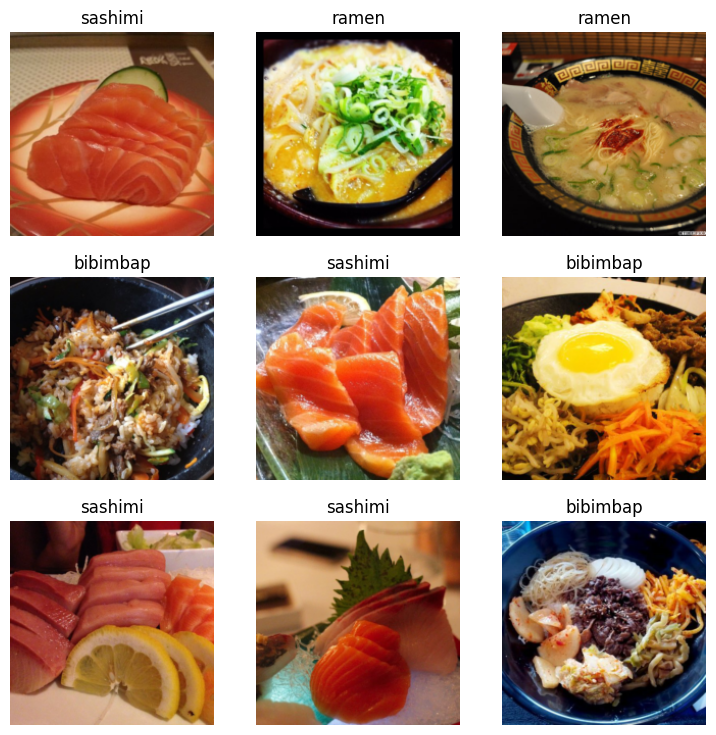

In [ ]:
#load the data using dataloader and getting it from foods.
#valid_pct is were using 20 percent of the images for validation
# the seed is the how many random times image will be generated
#resize value is the size of the images displayed
dls= ImageDataLoaders.from_name_func(
    foods, get_image_files(foods), valid_pct=0.2, seed=420,
    label_func=typ, item_tfms=Resize(200))
#shows us the images in random order
dls.valid.show_batch()

In [ ]:
#were going to include the data, resnet34=pre-trained image classficiation model, and rate of error 
cycle = vision_learner(dls, resnet34, metrics=error_rate, pretrained=True)
#were going to train the through 5 epochs. This means we are training all the data in a iteration of 5 cycles.
cycle.fine_tune(epochs=5)
#lower train loss is better

epoch,train_loss,valid_loss,error_rate,time
0,0.802513,0.263611,0.093333,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.291138,0.169467,0.058333,00:15
1,0.145672,0.178141,0.043333,00:14
2,0.083969,0.138240,0.036667,00:15
3,0.049618,0.145959,0.035000,00:14
4,0.032498,0.134300,0.036667,00:15


Saving spicy-vegetarian-ramen-recipe-3.jpg to spicy-vegetarian-ramen-recipe-3.jpg


The image is a ramen.
ramen probability percent is 0.9997697472572327
sashimi probability percent is 1.0279615025865496e-06
bibimbap probability percent is 0.00022919857292436063


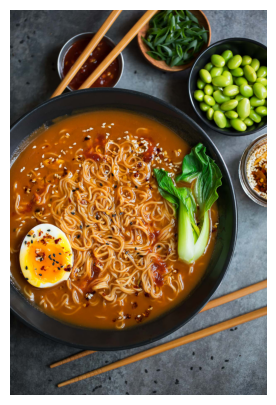

In [ ]:
#creates an evironment for user to import the images to classify
from google.colab import files
upload=files.upload()
for pic in upload.items():
  input=pic[0]

pic=PILImage.create(input)
pic.show()
#predicts/classifies image through completed training of the dataset
label,_,numb=cycle.predict(pic)
#uses the category/label to show what type image is.
print(f"The image is a {label}.")
#probability of the image matching that label
print(f"{af1} probability percent is {numb[1].item()}")
print(f"{af2} probability percent is {numb[2].item()}")
print(f"{af3} probability percent is {numb[0].item()}")

         



In [ ]:
#export model as a pkl file 
cycle.export()


In [ ]:
mod=get_files(foods, '.pkl')[0]
mod

Path('/root/.fastai/data/food-101/export.pkl')

In [ ]:
#downloads the pkl file to browser
from google.colab import files
files.download(mod)
     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>